In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
data=pd.read_csv(r"C:\Users\pc\Downloads\brain_stroke.csv")
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [112]:
data.shape

(4981, 11)

In [113]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [115]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [116]:
data.duplicated().sum()

0

<AxesSubplot:xlabel='bmi'>

<Figure size 800x800 with 0 Axes>

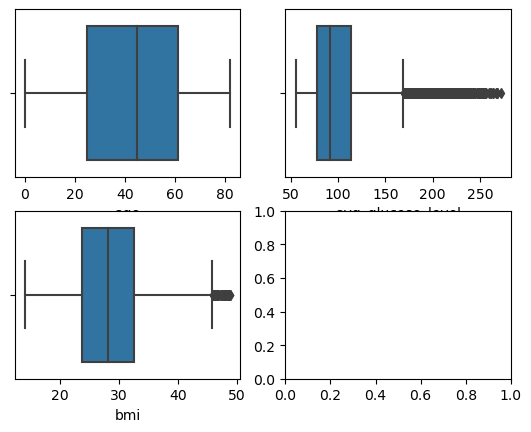

In [117]:
plt.figure(figsize=(8,8))
fig,axs=plt.subplots(nrows=2,ncols=2)
sns.boxplot(x='age',data=data,ax=axs[0,0])
sns.boxplot(x='avg_glucose_level',ax=axs[0,1],data=data)
sns.boxplot(x='bmi',ax=axs[1,0],data=data)

In [118]:
# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['bmi']))
print(z)

0       1.193238
1       0.589390
2       0.869222
3       0.662492
4       0.073909
          ...   
4976    0.191733
4977    0.383197
4978    0.486294
4979    0.221189
4980    0.088637
Name: bmi, Length: 4981, dtype: float64


In [119]:
threshold=3
np.where(data['bmi']>3)

(array([   0,    1,    2, ..., 4978, 4979, 4980], dtype=int64),)

In [120]:
# IQR
Q1 = np.percentile(data['avg_glucose_level'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['avg_glucose_level'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['avg_glucose_level'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['avg_glucose_level'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
print("New shape:",data.shape)

Old Shape:  (4981, 11)
New shape: (4379, 11)


In [121]:
data.bmi.min()

14.0

In [43]:
data.bmi.max()

48.9

In [122]:
data.avg_glucose_level.min()

55.12

In [123]:
data.avg_glucose_level.max()

168.68

### Claculate count of female who has stroke and also check smoking status there never smoke by work type

In [124]:
df1=data.loc[((data['gender']=='Female')&(data['stroke']==1))&(data['smoking_status']=='never smoked')]

In [125]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
12,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
15,Female,60.0,0,0,No,Private,Urban,89.22,37.8,never smoked,1
33,Female,49.0,0,0,Yes,Private,Urban,60.91,29.9,never smoked,1


In [126]:
df1.work_type.value_counts()


Private          22
Self-employed    16
Govt_job          4
Name: work_type, dtype: int64

### Claculate count of male who has stroke and also check smoking status there never smoke by work type

In [127]:
df2=data.loc[((data['gender']=='Male')&(data['stroke']==1))&(data['smoking_status']=='never smoked')]

In [128]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
21,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.5,never smoked,1
28,Male,48.0,0,0,No,Govt_job,Urban,84.20,29.7,never smoked,1
35,Male,54.0,0,0,Yes,Private,Urban,71.22,28.5,never smoked,1


In [129]:
df2.work_type.value_counts()

Private          8
Self-employed    6
Govt_job         2
Name: work_type, dtype: int64

In [130]:
data.age.min()

0.08

In [131]:
data.age.max()

82.0

In [132]:
age_cat=[]
for x in data['age']:
    if 0<=x<=10:
        age_cat.append('Child')
    elif 10<=x<=25:
        age_cat.append("young")
    else:
        age_cat.append('Older')
        

In [133]:
data.insert(2,"Age_Category",age_cat)

In [134]:
data.head()

,gender,age,Age_Category,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,Older,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,Male,74.0,Older,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,Older,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,Older,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,Older,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [135]:
#Calculate average bmi of males and females by their age category
data.groupby('Age_Category')['bmi'].mean()

Age_Category
Child    19.082957
Older    29.808304
young    26.030122
Name: bmi, dtype: float64

In [136]:
#Calculate average bmi of males and females by their worktype
data.groupby('work_type')['bmi'].mean()

work_type
Govt_job         29.805027
Private          29.273709
Self-employed    29.382024
children         20.144478
Name: bmi, dtype: float64

In [137]:
data.columns

Index(['gender', 'age', 'Age_Category', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [138]:
from sklearn.model_selection import train_test_split

In [95]:
x=data.iloc[:,[1,3,4,8,9]]
y=data.iloc[:,-1]

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)


TypeError: Singleton array array(80.) cannot be considered a valid collection.

In [100]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [102]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
data.stroke.value_counts()

0    4214
1     165
Name: stroke, dtype: int64

data is not balanced

### data Imbalanncing Technique

In [107]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [140]:
from imblearn.over_sampling import RandomOverSampler

AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DatasetsPair'